In [ ]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
# Pipeline Libraries

from sklearn import neighbors
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [ ]:
# Model Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
# Read csv files

df_train = pd.read_csv('Train_data.csv',header=None, na_values=' ?')
df_test = pd.read_csv('Test_data.csv',header=None, na_values=' ?')

In [ ]:
df_train.shape

(22745, 15)

In [ ]:
df_test.shape

(9816, 15)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Pre-Processing Data

**Train Dataset**

In [ ]:
df_train.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

**Test Dataset**

In [ ]:
df_test.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

**operating only on Training Dataset** 

In [ ]:
df_train_preprocessed = df_train

In [ ]:
df_train_preprocessed.isna().sum()

age                  0
workclass         1272
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1276
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     406
income               0
dtype: int64

In [ ]:
# Replacing the NA values with mode 
for col in ['workclass', 'occupation', 'native_country']:
    df_train_preprocessed[col].fillna(df_train_preprocessed[col].mode()[0], inplace=True)
   

In [ ]:
df_train_preprocessed = df_train_preprocessed.drop(['education'],axis=1)

'education' and 'education_num' represent same kind of data. So, One of them can be removed.

In [ ]:
df_train_preprocessed.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**operating only on Testing Dataset**

In [ ]:
df_test_preprocessed = df_test

In [ ]:
df_test_preprocessed.isna().sum()

age                 0
workclass         564
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        567
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    177
income              0
dtype: int64

In [ ]:
for col in ['workclass', 'occupation', 'native_country']:
    df_test_preprocessed[col].fillna(df_test_preprocessed[col].mode()[0], inplace=True)

In [ ]:
df_test_preprocessed = df_test_preprocessed.drop(['education'],axis=1)

In [ ]:
df_test_preprocessed.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Encoding income column

In [ ]:

# Replacing '50K' with '0' and '1'

df_train_preprocessed = df_train_preprocessed.replace({' <=50K':0,' >50K':1})
df_test_preprocessed = df_test_preprocessed.replace({' <=50K':0,' >50K':1})

In [ ]:
df_train_preprocessed.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


# Data Exploration

**Exploring Data**

In [ ]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [ ]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist()

In [ ]:
list_numerical_col = get_col(df=df_train_preprocessed,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_train_preprocessed,
                               type_descr=np.object)
list_columns = get_col(df=df_train_preprocessed,
                       type_descr=[np.object, np.number])

In [ ]:
list_numerical_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

In [ ]:
list_categorical_col

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

**Histograms**

In [ ]:
df_train_preprocessed.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

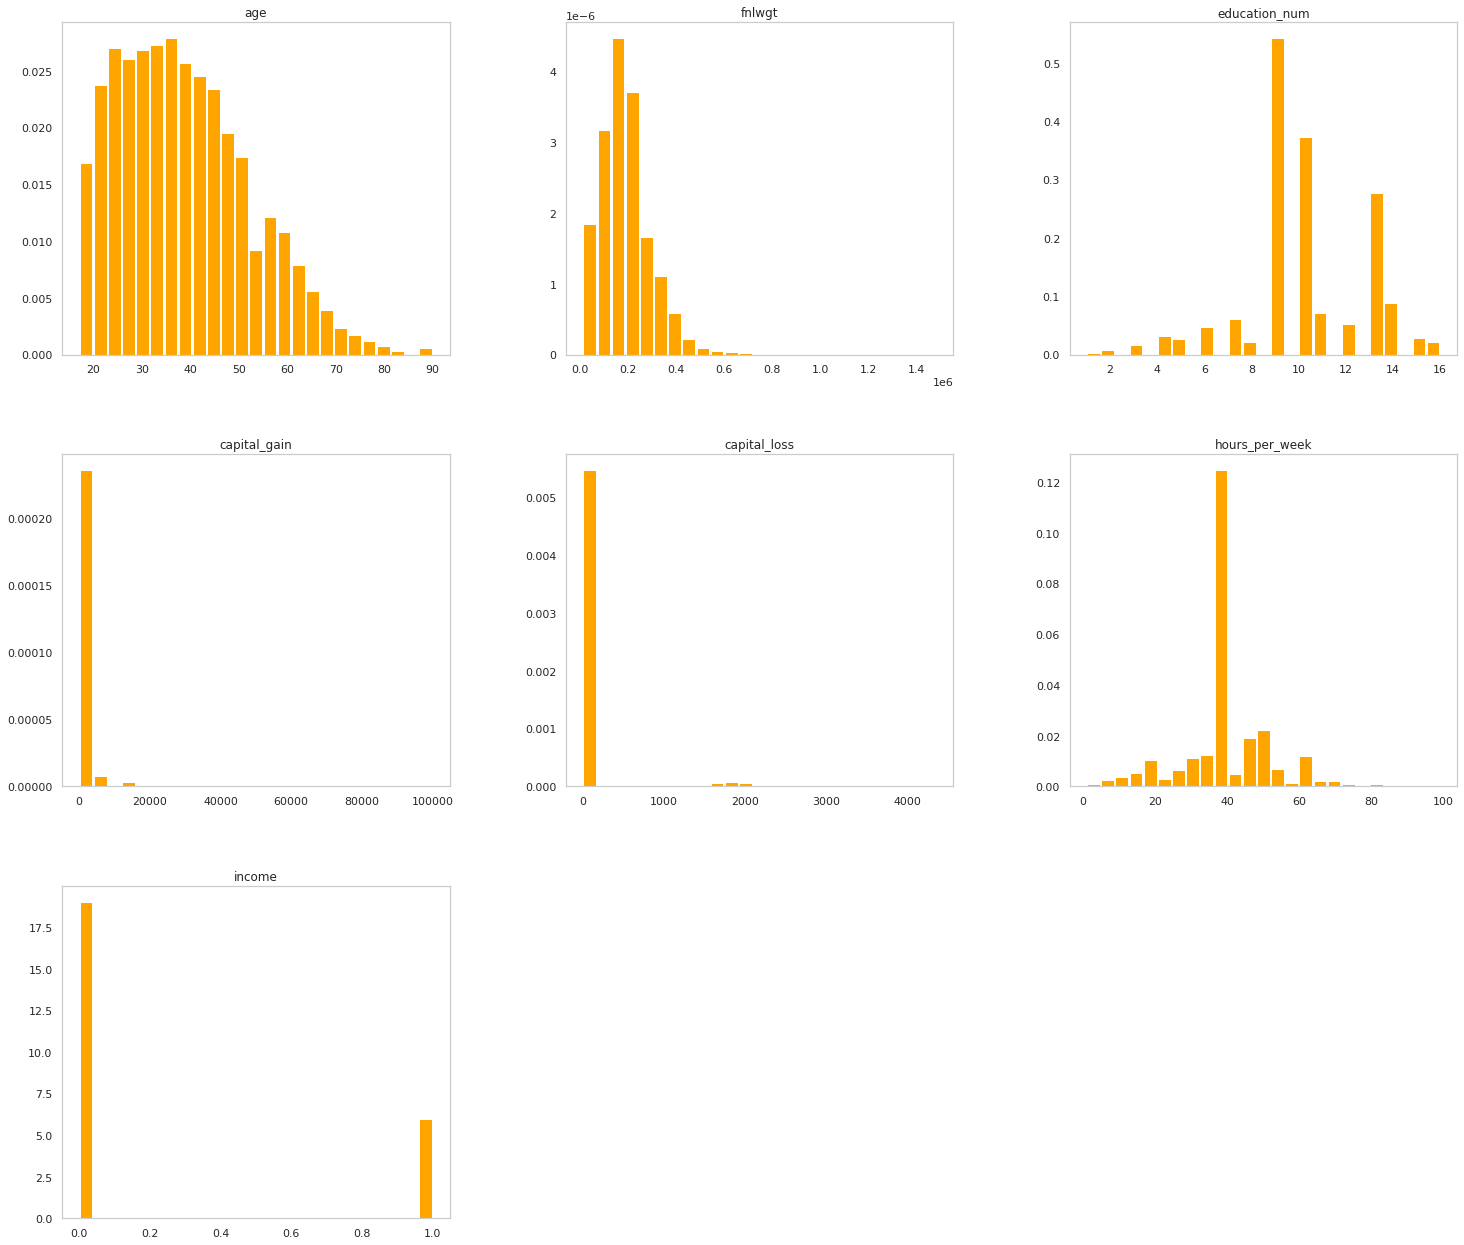

In [ ]:
# the histogram of the data
x = df_train_preprocessed[list_numerical_col].hist(figsize=[25,22], 
                                density=True, 
                                bins=25, 
                                grid=False, 
                                color='orange', 
                                zorder=2, 
                                rwidth=0.9)

**Observation :** 
Majority of value in 'capital_gain' and 'capital_loss' is 0 (zero).So we can drop both columns as they are sparse.

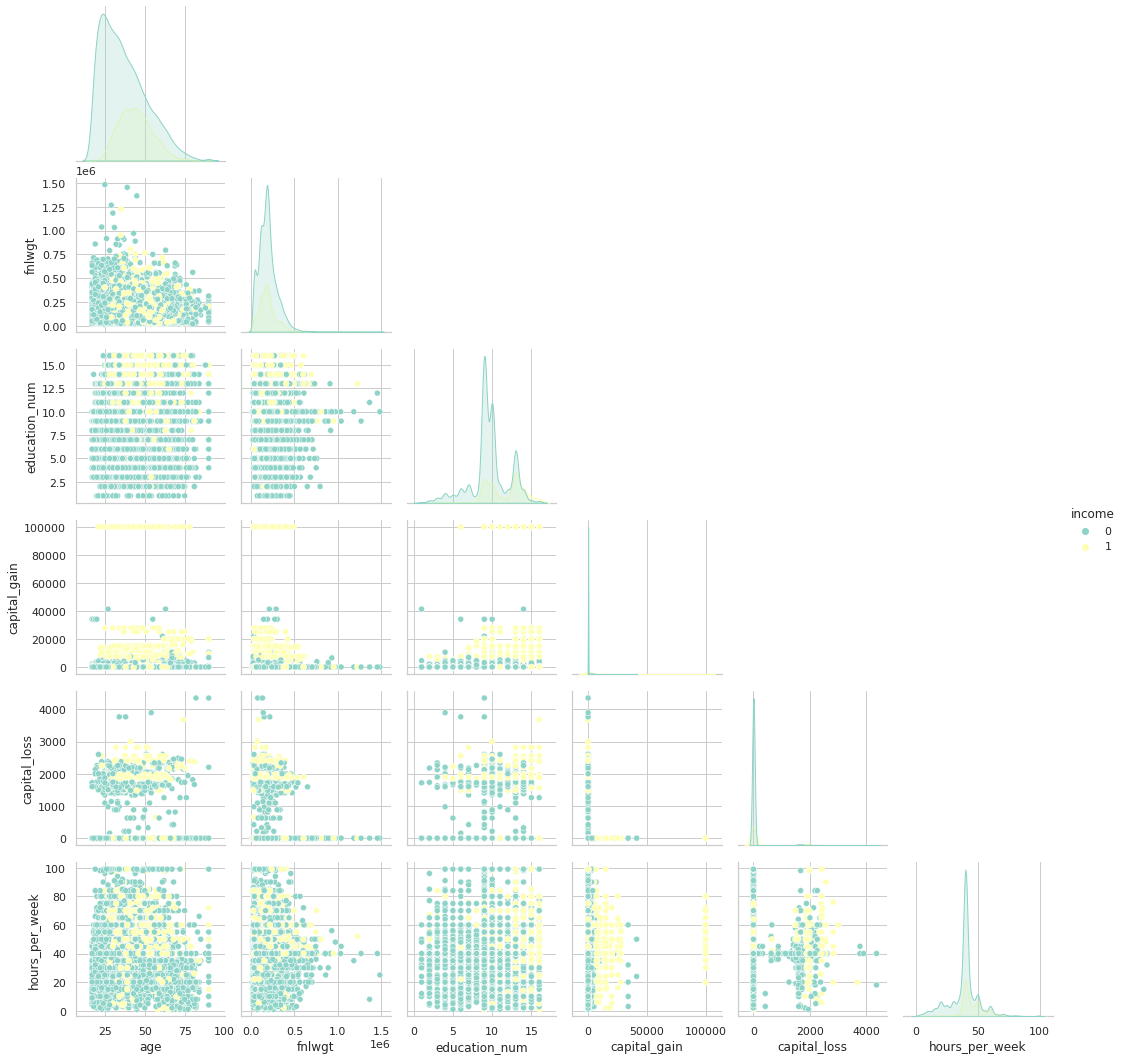

In [ ]:
sns.pairplot(df_train_preprocessed, kind='scatter', diag_kind='kde',corner=True, hue='income')

**Observation :** There is no particular feature which is highly correlated.

In [ ]:
df_train_preprocessed.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.075783,0.029536,0.074821,0.051645,0.061058,0.227657
fnlwgt,-0.075783,1.000000,-0.041581,0.002275,-0.017207,-0.013423,-0.009480
education_num,0.029536,-0.041581,1.000000,0.117158,0.077345,0.143010,0.329904
capital_gain,0.074821,0.002275,0.117158,1.000000,-0.031292,0.074763,0.220639
capital_loss,0.051645,-0.017207,0.077345,-0.031292,1.000000,0.055742,0.147737
hours_per_week,0.061058,-0.013423,0.143010,0.074763,0.055742,1.000000,0.224418
income,0.227657,-0.009480,0.329904,0.220639,0.147737,0.224418,1.000000


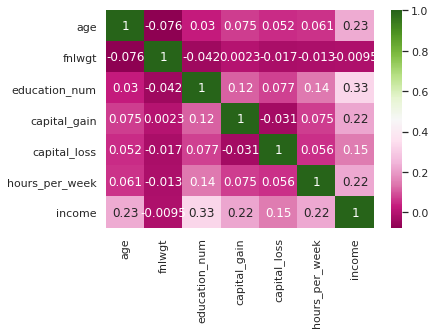

In [ ]:
sns.heatmap(df_train_preprocessed.corr(), annot=True, cmap="PiYG")

**Observation :**
- Except 'fnlwgt', all numerical features are positively correlated with 'income'. 

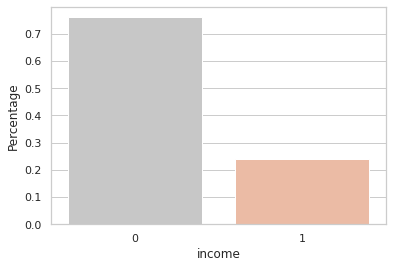

In [ ]:
eda_percentage = df_train_preprocessed['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='RdGy_r')

In [ ]:
eda_percentage

,income,Percentage
0,0,0.76131
1,1,0.23869


**Observation :**
- The number of records with income "<=50K" is around 76% and ">50K" is around 24%.
- The class distribution is moderate imbalanced.

In [ ]:
df_exploratory = df_train_preprocessed

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x <= 18 ):
        return "Less than 18"    
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_exploratory['age_group'] = df_exploratory['age'].apply(age_group)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


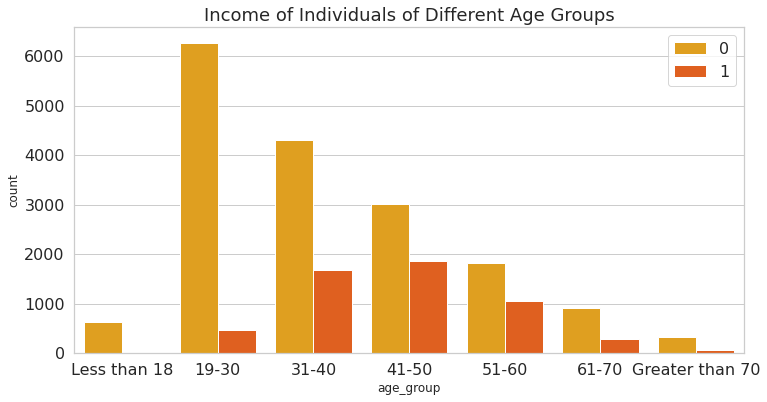

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['Less than 18','19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df_exploratory['age_group'], hue = df_exploratory['income'], palette='autumn_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

**Observation :**
- There is gradual decrease in number of people earning less than $50K'.

- People earning more than $50K rise as they become older, up to a point.

In [ ]:
df_exploratory.workclass.value_counts()

 Private             17083
 Self-emp-not-inc     1810
 Local-gov            1482
 State-gov             892
 Self-emp-inc          776
 Federal-gov           690
 Without-pay             8
 Never-worked            4
Name: workclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


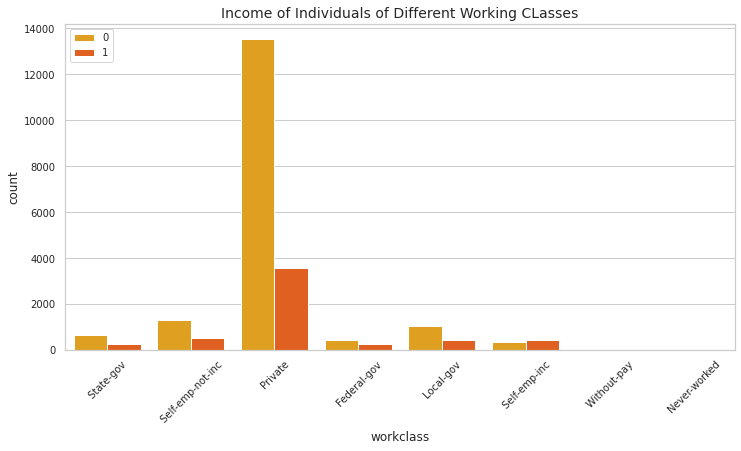

In [ ]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df_exploratory['workclass'], hue = df_exploratory['income'],  palette='autumn_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=14)
plt.xticks(fontsize=10,rotation = 45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

**Observation**
- There is significant income difference between people working in 'Private' working class.
- The People working at 'federal government', 'local government' have almost similar number of people on both classes.
- The 'Self Employed included' is the only working class having more people in more tha >50K category instead of less than <=$50K.


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

<Figure size 864x432 with 0 Axes>

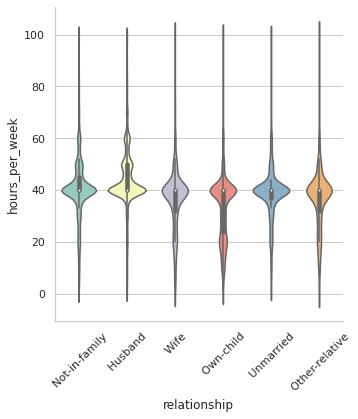

In [ ]:
ig = plt.figure(figsize = (12, 6))
sns.catplot(x = 'relationship', y='hours_per_week', data=df_exploratory, kind="violin")
plt.xticks(rotation = 45)

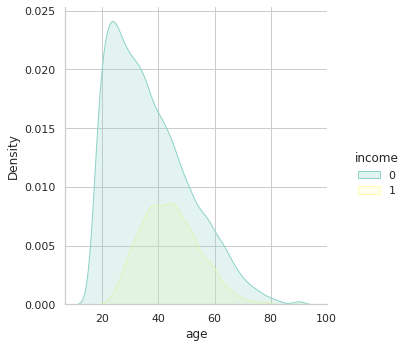

In [ ]:
sns.displot(df_exploratory, x='age',kind= 'kde', hue = 'income', fill= 'income')

# Data Pipeline

In [ ]:
df_pipeline = df_exploratory

In [ ]:
df_pipeline = df_pipeline.drop(columns=['age_group'])

Checking if there is any skewed Distribution in 'age'

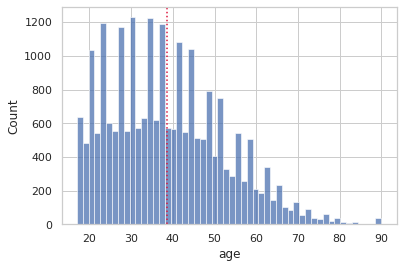

In [ ]:
sns.histplot(df_pipeline, x='age')
plt.axvline(np.mean(df_pipeline['age']), color='crimson', ls=':')
plt.show()

Applying **Standardization** as it handles outliers better compared to Normalization.

**Scaling Train Data**

In [ ]:
df_train_scaled = df_pipeline

In [ ]:
# Standardize the inputs
scaler = StandardScaler()
list_scaling = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
df_train_scaled[list_scaling] = scaler.fit_transform(df_train_scaled[list_scaling])

In [ ]:
#list_scaling = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

In [ ]:
#df_train_scaled[list_scaling] = scaler.fit_transform(df_train_scaled[list_scaling])

In [ ]:
df_train_scaled.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.029667,State-gov,-1.067994,1.140369,Never-married,Adm-clerical,Not-in-family,White,Male,0.152318,-0.216324,-0.033180,United-States,0
1,0.834990,Self-emp-not-inc,-1.012796,1.140369,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.144651,-0.216324,-2.231066,United-States,0
2,-0.043544,Private,0.247704,-0.423862,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.144651,-0.216324,-0.033180,United-States,0


**Scaling the test data**

In [ ]:
df_test_scaled = df_test_preprocessed
df_test_scaled[list_scaling]  = scaler.transform(df_test_scaled[list_scaling])

In [ ]:
#df_test_scaled[list_scaling]  = scaler.transform(df_test_scaled[list_scaling])

In [ ]:
df_test_scaled.income.value_counts()

0    7404
1    2412
Name: income, dtype: int64

In [ ]:
df_test_scaled_encoded = df_test_scaled

**Encoding  Categorical Features**

In [ ]:
df_train_scaled_encoded = df_train_scaled

In [ ]:
df_train_scaled_encoded.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.029667,State-gov,-1.067994,1.140369,Never-married,Adm-clerical,Not-in-family,White,Male,0.152318,-0.216324,-0.033180,United-States,0
1,0.834990,Self-emp-not-inc,-1.012796,1.140369,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.144651,-0.216324,-2.231066,United-States,0
2,-0.043544,Private,0.247704,-0.423862,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.144651,-0.216324,-0.033180,United-States,0


In [ ]:
for feature in list_categorical_col:
    le = preprocessing.LabelEncoder()
    df_train_scaled_encoded[feature] = le.fit_transform(df_train_scaled_encoded[feature])
    df_test_scaled_encoded[feature] = le.transform(df_test_scaled_encoded[feature])

In [ ]:
df_train_scaled_encoded.head(3)  # Train Data Scaled + Encoded 

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.029667,6,-1.067994,1.140369,4,0,1,4,1,0.152318,-0.216324,-0.033180,38,0
1,0.834990,5,-1.012796,1.140369,2,3,0,4,1,-0.144651,-0.216324,-2.231066,38,0
2,-0.043544,3,0.247704,-0.423862,0,5,1,4,1,-0.144651,-0.216324,-0.033180,38,0


In [ ]:
df_test_scaled_encoded.head(3)  # Test Data Scaled + Encoded

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,-0.116755,5,-0.333373,0.749311,2,4,0,4,1,0.142893,-0.216324,0.780851,38,0
1,0.029667,3,2.870470,1.140369,4,3,2,2,1,-0.144651,-0.216324,0.373835,38,0
2,-0.409599,3,1.995002,-0.423862,0,13,4,4,0,-0.144651,-0.216324,-0.033180,38,0


# Models

In [ ]:
df_model_train = df_train_scaled_encoded
df_model_test = df_test_scaled_encoded

In [ ]:
df_model_train.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.029667,6,-1.067994,1.140369,4,0,1,4,1,0.152318,-0.216324,-0.033180,38,0
1,0.834990,5,-1.012796,1.140369,2,3,0,4,1,-0.144651,-0.216324,-2.231066,38,0
2,-0.043544,3,0.247704,-0.423862,0,5,1,4,1,-0.144651,-0.216324,-0.033180,38,0


In [ ]:
df_model_test.head(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,-0.116755,5,-0.333373,0.749311,2,4,0,4,1,0.142893,-0.216324,0.780851,38,0
1,0.029667,3,2.870470,1.140369,4,3,2,2,1,-0.144651,-0.216324,0.373835,38,0
2,-0.409599,3,1.995002,-0.423862,0,13,4,4,0,-0.144651,-0.216324,-0.033180,38,0


In [ ]:
# Training Data
X_train = df_model_train.drop(columns=['income'])
y_train = df_model_train.income

# Testing Data

X_test = df_model_test.drop(columns=['income'])
y_test = df_model_test.income

# KNN

In [ ]:
# Generate a kNN model
knn_model = neighbors.KNeighborsClassifier()
print(knn_model.get_params())

# Distance and Weight Array
n = np.arange(1,21)
dist = np.array(['euclidean', 'manhattan'])
weight = np.array(['uniform', 'distance'])

#Finding Best Performing Parameters
results = pd.DataFrame(columns = ['#neighbors','distance', 'weight', 'acc_score'])
index = 0
for i in n:
  for j in dist:
    for k in weight:
      knn_model = neighbors.KNeighborsClassifier(n_neighbors=i, metric=j, weights=k)
      knn_model.fit(X_train, y_train)
      pred = knn_model.predict(X_test)
      acc_score = accuracy_score(y_test, pred)
      #rmse = mean_squared_error(y_test, pred, squared=False)
      results.loc[index] = [i,j,k,acc_score]
      index +=1
print('Best performing model')      
print(tabulate(results[results['acc_score']==results['acc_score'].max()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best performing model
+----+--------------+------------+----------+-------------+
|    |   #neighbors | distance   | weight   |   acc_score |
|----+--------------+------------+----------+-------------|
| 78 |           20 | manhattan  | uniform  |    0.837205 |
+----+--------------+------------+----------+-------------+
All results
+----+--------------+------------+----------+-------------+
|    |   #neighbors | distance   | weight   |   acc_score |
|----+--------------+------------+----------+-------------|
|  0 |            1 | euclidean  | uniform  |    0.799104 |
|  1 |            1 | euclidean  | distance |    0.799104 |
|  2 |            1 | manhattan  | uniform  |    0.796455 |
|  3 |            1 | manhattan  | distance |    0.796455 |
|  4 |            2 | euclidean  | uniform  |    0.811125 |
|  5 |            2 | euclidean  | di

In [ ]:
print('Best performing model')      
print(tabulate(results[results['acc_score']==results['acc_score'].max()], headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+--------------+------------+----------+-------------+
|    |   #neighbors | distance   | weight   |   acc_score |
|----+--------------+------------+----------+-------------|
| 78 |           20 | manhattan  | uniform  |    0.837205 |
+----+--------------+------------+----------+-------------+


In [ ]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=20, metric='manhattan', weights='uniform')
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)

acc_score_knn = accuracy_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
precision_knn = precision_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)
roc_knn = roc_auc_score(y_test, pred_knn)

print(classification_report(y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7404
           1       0.72      0.55      0.63      2412

    accuracy                           0.84      9816
   macro avg       0.79      0.74      0.76      9816
weighted avg       0.83      0.84      0.83      9816



**Grid Search Best Model**

In [ ]:
parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}
optimized_model = GridSearchCV(knn_model, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(X_train, y_train)

results_grid = pd.DataFrame(optimized_model.cv_results_)
tabulate(results_grid, headers = 'keys', tablefmt = 'psql')

print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

Best score:  -0.4000830807772259
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')


#Logistic

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logistic = logreg.predict(X_test)

acc_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_logistic = roc_auc_score(y_test, y_pred_logistic)
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7404
           1       0.73      0.46      0.57      2412

    accuracy                           0.83      9816
   macro avg       0.79      0.70      0.73      9816
weighted avg       0.82      0.83      0.81      9816



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Logistic Regression Accuracy ", acc_logistic)

Logistic Regression Accuracy  0.8266096169519153


In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

# Check the best hyperparmaters
gs_log_reg.best_params_

# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   12.4s finished


0.8254889975550123

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

rs_log_reg.best_params_

rs_log_reg.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished


0.8253871230643847

# Naive Bayes ( Gaussian NB )

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
#print(classification_report(y_test, y_pred_nb))

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Gaussian Accuracy : ", accuracy_nb)

Naive Bayes Gaussian Accuracy :  0.8057253463732681


In [ ]:

recall_nb = recall_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_nb = roc_auc_score(y_test, y_pred_nb)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7404
           1       0.72      0.34      0.46      2412

    accuracy                           0.81      9816
   macro avg       0.77      0.65      0.67      9816
weighted avg       0.79      0.81      0.78      9816



# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred_decision_tree = model.predict (X_test)
print('Accuracy: ', accuracy_score(y_test, pred_decision_tree))

Accuracy:  0.8081703341483293


**Hyper Parameter Tuning - Decision Tree**

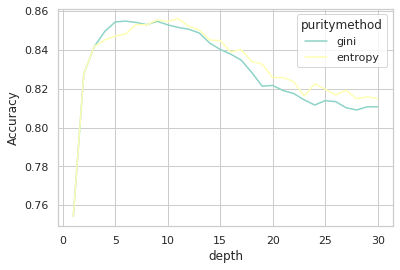

In [ ]:
ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'Accuracy'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, accuracy_score(y_test, pred)]
    ind+=1
sns.lineplot(x = 'depth', y = 'Accuracy', hue='puritymethod', data = df_results)

In [ ]:
df_results.sort_values(by=['Accuracy'],ascending=False).head()
#df.sort_values(by=['col1'])

,depth,puritymethod,Accuracy
22,11,entropy,0.856051
18,9,entropy,0.855440
11,6,gini,0.854829
17,9,gini,0.854727
20,10,entropy,0.854625


In [ ]:
print('Best performing model - Decision Tree')      
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

Best performing model - Decision Tree
+----+---------+----------------+------------+
|    |   depth | puritymethod   |   Accuracy |
|----+---------+----------------+------------|
| 22 |      11 | entropy        |   0.856051 |
+----+---------+----------------+------------+


In [ ]:
model = DecisionTreeClassifier(max_depth=11, criterion='entropy')
model.fit(X_train, y_train)
pred_dt = model.predict (X_test)
accuracy_dt = accuracy_score(y_test, pred)
print("Decision Tree Accuracy : ",accuracy_dt)

Decision Tree Accuracy :  0.8148940505297474


In [ ]:
#accuracy_dt = accuracy_score(y_test, pred_dt)
recall_dt = recall_score(y_test, pred_dt)
precision_dt = precision_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)
roc_dt = roc_auc_score(y_test, pred_dt)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7404
           1       0.75      0.63      0.68      2412

    accuracy                           0.86      9816
   macro avg       0.82      0.78      0.79      9816
weighted avg       0.85      0.86      0.85      9816



# Decision Tree Pruned

In [ ]:
model_pruned = DecisionTreeClassifier()
model_pruned.fit(X_train, y_train)
pred_dt_pruned = model_pruned.predict (X_test)
print('Accuracy: ', accuracy_score(y_test, pred_dt_pruned))

Accuracy:  0.8080684596577017


In [ ]:
path = model_pruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 2.14191905e-05 2.14594521e-05 ... 2.04721466e-02
 2.51696703e-02 5.72048753e-02]


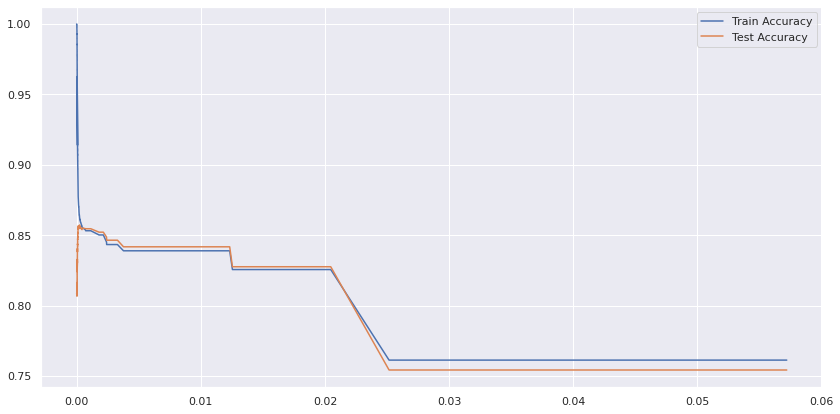

In [ ]:
ccp_val = 1
df_alpha = pd.DataFrame(columns = ['Alpha', 'Accuracy'])
accuracy_train, accuracy_test=[],[]

for i in ccp_alphas:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred=tree.predict(X_test)
  df_alpha.loc[ccp_val] = [i, accuracy_score(y_test, y_test_pred)]
  ccp_val+=1

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x= ccp_alphas, label ="Train Accuracy")
sns.lineplot(y=accuracy_test, x= ccp_alphas, label ="Test Accuracy")
plt.show()

In [ ]:
# Best CCP Value
df_alpha[df_alpha['Accuracy']==df_alpha['Accuracy'].max()]

,Alpha,Accuracy
1204,0.000241,0.857274
1205,0.000242,0.857274


In [ ]:
from sklearn.metrics import accuracy_score
tree_pruned = DecisionTreeClassifier(ccp_alpha= 0.000245, random_state=0)
tree_pruned.fit(X_train,y_train)
pred_prun = tree_pruned.predict(X_test)

accuracy_dt_pruned = accuracy_score(y_test,y_test_pred)
print("Accuracy DT Pruned : ",accuracy_dt_pruned)

Accuracy DT Pruned :  0.7542787286063569


In [ ]:
#acc_logistic = accuracy_score(y_test, y_pred_logistic)
recall_dt_pruned = recall_score(y_test, pred_prun)
precision_dt_pruned = precision_score(y_test, pred_prun)
f1_dt_pruned = f1_score(y_test, pred_prun)
roc_dt_pruned = roc_auc_score(y_test, pred_prun)
print(classification_report(y_test, pred_prun))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7404
           1       0.74      0.64      0.69      2412

    accuracy                           0.86      9816
   macro avg       0.82      0.78      0.80      9816
weighted avg       0.85      0.86      0.85      9816



# Neural Network

In [ ]:
model = MLPClassifier(max_iter=800, learning_rate_init= 0.005)
model.fit(X_train, y_train)
pred = model.predict(X_test)

acc_neural= accuracy_score(y_test,pred)
print("Accuracy Score - Neural Networks ",acc_neural)

#print("Accuracy Score - Neural Networks ",accuracy_score(y_test, pred))

Accuracy Score - Neural Networks  0.8559494702526488


In [ ]:
#acc_neural= accuracy_score(y_test,pred)
#print(acc_neural)
recall_neural = recall_score(y_test, pred)
precision_neural = precision_score(y_test, pred)
f1_neural = f1_score(y_test, pred)
roc_neural = roc_auc_score(y_test, pred)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7404
           1       0.74      0.64      0.69      2412

    accuracy                           0.86      9816
   macro avg       0.81      0.78      0.80      9816
weighted avg       0.85      0.86      0.85      9816



In [ ]:
result = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'Accuracy'])
lr = [0.00001, 0.0001, 0.01, 0.03, 1, 3, 10]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    model = MLPClassifier(learning_rate_init= i, activation=j)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    result.loc[k] = [i, j,  accuracy_score(y_test, pred)]
    k+=1
print(tabulate(result, headers=result.columns, tablefmt='grid'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


+----+-----------------+---------------------+------------+
|    |   Learning Rate | Transfer Function   |   Accuracy |
+====+=================+=====================+============+
|  0 |          1e-05  | identity            |   0.826304 |
+----+-----------------+---------------------+------------+
|  1 |          1e-05  | logistic            |   0.816117 |
+----+-----------------+---------------------+------------+
|  2 |          1e-05  | tanh                |   0.829564 |
+----+-----------------+---------------------+------------+
|  3 |          1e-05  | relu                |   0.829156 |
+----+-----------------+---------------------+------------+
|  4 |          0.0001 | identity            |   0.825998 |
+----+-----------------+---------------------+------------+
|  5 |          0.0001 | logistic            |   0.84617  |
+----+-----------------+---------------------+------------+
|  6 |          0.0001 | tanh                |   0.850346 |
+----+-----------------+----------------

**NN classifier with cross validation**

In [ ]:

model = MLPClassifier(learning_rate_init= 0.01, activation='logistic', max_iter=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross Validation Acccuracy:', scores)
print('Avg. Cross Validation Acccuracy:', scores.mean())

Cross Validation Acccuracy: [0.84062431 0.847439   0.84546054 0.84875797 0.84831831]
Avg. Cross Validation Acccuracy: 0.8461200263794242


**NN classifier with grid search CV**

In [ ]:

model = MLPClassifier()
parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'), 'learning_rate_init':[0.00001, 0.0001,0.01, 0.03, 1, 3, 10]}
optimized_model = GridSearchCV(model, parameters, cv=5)
optimized_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [ ]:
print(tabulate(optimized_model.cv_results_, headers=optimized_model.cv_results_.keys(), tablefmt='grid'))

+-----------------+----------------+-------------------+------------------+--------------------+----------------------------+----------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_activation   |   param_learning_rate_init | params                                                   |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
+=================+================+===================+==================+====================+============================+==========================================================+=====================+=====================+=====================+=====================+====================

In [ ]:
optimized_model.best_score_

0.8482303803033634

**Bagging Classifier**

In [ ]:
from sklearn import tree
model_bagging = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=30),n_estimators=50, random_state=1).fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
#print('F1 Score: ', f1_score(y_test, pred_bagging))
fpr, tpr, _ = roc_curve(y_test, pred_bagging)
#roc_auc = auc(y_test, pred)
#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange', lw=lw)

In [ ]:
acc_dt_bag = accuracy_score(y_test, pred_bagging)
recall_dt_bag= recall_score(y_test, pred_bagging)
precision_dt_bag = precision_score(y_test, pred_bagging)
f1_dt_bag = f1_score(y_test, pred_bagging)
roc_dt_bag = roc_auc_score(y_test, pred_bagging)
print(classification_report(y_test, pred_bagging))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7404
           1       0.73      0.62      0.67      2412

    accuracy                           0.85      9816
   macro avg       0.81      0.77      0.79      9816
weighted avg       0.84      0.85      0.85      9816



In [ ]:
print("Bagging Classifier Accuracy : ",acc_dt_bag)

Bagging Classifier Accuracy :  0.8501426242868786


**Hyperparameter Tuning - Baggging Classifier**

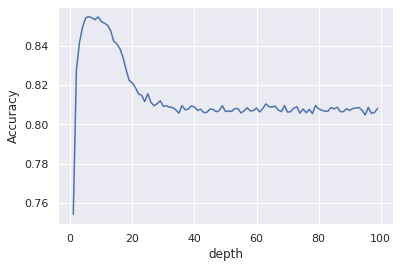

In [ ]:
results_bag_hyper = pd.DataFrame(columns = ['depth', 'Accuracy'])
for i in np.arange(1, 100):
  model = tree.DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  results_bag_hyper.loc[i] = [i, accuracy_score(y_test, pred)]
sns.lineplot(x = 'depth', y = 'Accuracy', data = results_bag_hyper)

In [ ]:
print('Best HyperParameter - Bagging Classifier')      
print(tabulate(results_bag_hyper[results_bag_hyper['Accuracy']==results_bag_hyper['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

Best HyperParameter - Bagging Classifier
+----+---------+------------+
|    |   depth |   Accuracy |
|----+---------+------------|
|  6 |       6 |   0.854727 |
+----+---------+------------+


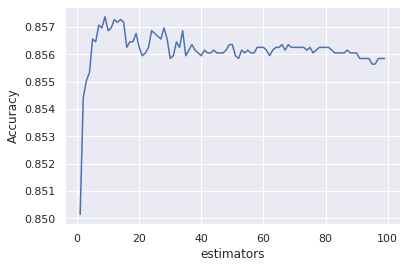

In [ ]:
results_bag_hyper_post = pd.DataFrame(columns = ['estimators', 'Accuracy'])
for i in np.arange(1, 100):
  model_bagging = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=6), n_estimators=i, random_state=0).fit(X_train, y_train)
  pred_bag_hyper_post = model_bagging.predict(X_test)
  results_bag_hyper_post.loc[i] = [i, accuracy_score(y_test, pred_bag_hyper_post)]
sns.lineplot(x = 'estimators', y = 'Accuracy', data = results_bag_hyper_post)

In [ ]:
print('Best HyperParameter - Bagging Classifier')      
print(tabulate(results_bag_hyper_post[results_bag_hyper_post['Accuracy']==results_bag_hyper_post['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

Best HyperParameter - Bagging Classifier
+----+--------------+------------+
|    |   estimators |   Accuracy |
|----+--------------+------------|
|  9 |            9 |   0.857376 |
+----+--------------+------------+


In [ ]:
model_bagging = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=6), n_estimators=9, random_state=0).fit(X_train, y_train)
pred_bag_hyper_post = model_bagging.predict(X_test)

In [ ]:
acc_bag_hyper_post = accuracy_score(y_test, pred_bag_hyper_post)
recall_bag_hyper_post = recall_score(y_test, pred_bag_hyper_post)
precision_bag_hyper_post = precision_score(y_test, pred_bag_hyper_post)
f1_bag_hyper_post  = f1_score(y_test, pred_bag_hyper_post)
roc_bag_hyper_post  = roc_auc_score(y_test, pred_bag_hyper_post)
print(classification_report(y_test, pred_bag_hyper_post))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7404
           1       0.80      0.55      0.66      2412

    accuracy                           0.86      9816
   macro avg       0.84      0.76      0.78      9816
weighted avg       0.85      0.86      0.85      9816



**Random Forest**

In [ ]:

model_RF = RandomForestClassifier(max_depth=30, n_estimators=50, random_state=2).fit(X_train, y_train)
pred_dt_random = model_RF.predict(X_test)
#'F1 Score: ', f1_score(y_test, pred_dt_random))
fpr, tpr, _ = roc_curve(y_test, pred_dt_random)
#roc_auc = auc(y_test, pred)
#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange', lw=lw)

In [ ]:
acc_dt_random = accuracy_score(y_test, pred_dt_random)
recall_dt_random = recall_score(y_test, pred_dt_random)
precision_dt_random = precision_score(y_test, pred_dt_random)
f1_dt_random  = f1_score(y_test, pred_dt_random)
roc_dt_random  = roc_auc_score(y_test, pred_dt_random)
print(classification_report(y_test, pred_dt_random))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7404
           1       0.76      0.62      0.68      2412

    accuracy                           0.86      9816
   macro avg       0.82      0.78      0.80      9816
weighted avg       0.85      0.86      0.85      9816



In [ ]:
print("Random Forest Accuracy : ",acc_dt_random)

Random Forest Accuracy :  0.8582925835370823


**Results of all models**

In [ ]:
models = [('kNN', acc_score_knn, recall_knn, precision_knn, f1_knn, roc_knn),
          ('Logistic Regression', acc_logistic, recall_logistic, precision_logistic, f1_logistic, roc_logistic),
          ('Naive Bayes', accuracy_nb, recall_nb, precision_nb, f1_nb, roc_nb),
          ('Decision Tree', accuracy_dt, recall_dt, precision_dt, f1_dt, roc_dt),
          ('Decision Tree Pruned', accuracy_dt_pruned, recall_dt_pruned, precision_dt_pruned, f1_dt_pruned, roc_dt_pruned),
          ('Neural Networks', acc_neural, recall_neural, precision_neural, f1_neural, roc_neural),
          ('Bagging', acc_dt_bag, recall_neural, precision_neural, f1_neural, roc_neural),
          ('Bagging Parameter Tuned', acc_bag_hyper_post, recall_bag_hyper_post, precision_bag_hyper_post, f1_bag_hyper_post, roc_bag_hyper_post),
          ('Random Forest', acc_dt_random, recall_dt_random, precision_dt_random, f1_dt_random, roc_dt_random)]


df_all_models = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC'])

df_all_models.sort_values(by=['Accuracy (%)'],ascending=False)


,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC
8,Random Forest,0.858293,0.621891,0.757959,0.683216,0.778598
7,Bagging Parameter Tuned,0.857376,0.553897,0.804819,0.656189,0.755069
5,Neural Networks,0.855949,0.643864,0.736717,0.687168,0.784452
6,Bagging,0.850143,0.643864,0.736717,0.687168,0.784452
0,kNN,0.837205,0.553897,0.719053,0.625761,0.741697
1,Logistic Regression,0.826610,0.463930,0.732330,0.568020,0.704345
3,Decision Tree,0.814894,0.627695,0.745446,0.681521,0.778934
2,Naive Bayes,0.805725,0.342454,0.720139,0.464175,0.649550
4,Decision Tree Pruned,0.754279,0.639303,0.743133,0.687319,0.783658


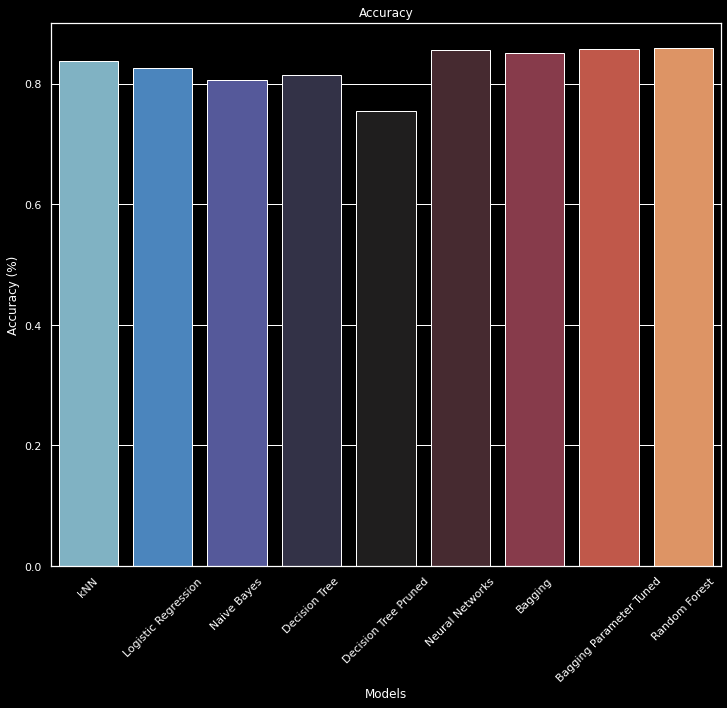

In [ ]:
plt.style.use("dark_background")

plt.subplots(figsize=(12, 10))
sns.barplot(y = df_all_models['Accuracy (%)'], x = df_all_models['Model'], palette = 'icefire')
plt.xlabel("Models")
plt.title('Accuracy')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
print('Best Model')
df_best_model = df_all_models.sort_values(by=['Accuracy (%)'],ascending=False).head(1)
print(tabulate(df_best_model, headers = 'keys', tablefmt = 'psql'))

Best Model
+----+---------------+----------------+--------------+-----------------+----------+----------+
|    | Model         |   Accuracy (%) |   Recall (%) |   Precision (%) |   F1 (%) |      AUC |
|----+---------------+----------------+--------------+-----------------+----------+----------|
|  8 | Random Forest |       0.858293 |     0.621891 |        0.757959 | 0.683216 | 0.778598 |
+----+---------------+----------------+--------------+-----------------+----------+----------+


**ROC Curve**

In [ ]:

fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_knn)
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred_logistic)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt)
fpr_dt_pruned, tpr_dt_pruned, _ = roc_curve(y_test, pred_prun)
fpr_nnet, tpr_nnet, _ = roc_curve(y_test, pred)
fpr_bg, tpr_bg, _ = roc_curve(y_test, pred_bagging)
fpr_bg_hyper, tpr_bg_hyper, _ = roc_curve(y_test, pred_bag_hyper_post)
fpr_rf, tpr_rf, _ = roc_curve(y_test, pred_dt_random)


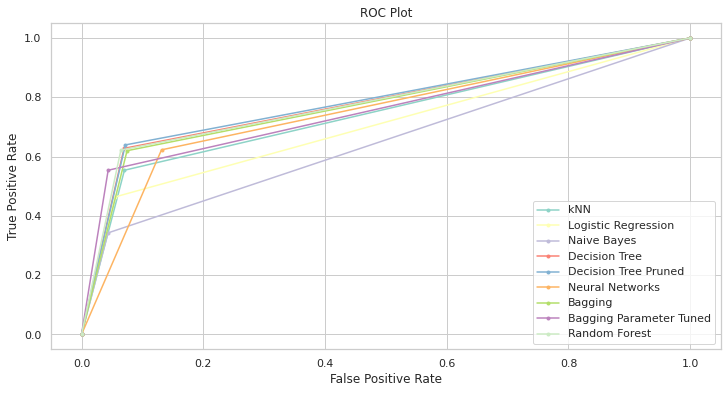

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))


plt.plot(fpr_knn, tpr_knn, marker='.', label='kNN')
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes')
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree')
plt.plot(fpr_dt_pruned, tpr_dt_pruned, marker='.', label='Decision Tree Pruned')
plt.plot(fpr_nnet, tpr_nnet, marker='.', label='Neural Networks')
plt.plot(fpr_bg, tpr_bg, marker='.', label='Bagging')
plt.plot(fpr_bg_hyper, tpr_bg_hyper, marker='.', label='Bagging Parameter Tuned')
plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest')


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
 
plt.show()

**Variable Forward Selection Procedure**

In [ ]:

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Forward Feature 
sfs1 = sfs(clf,
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)
sfs1 = sfs1.fit(X_train, y_train)

feat_cols = list(sfs1.k_feature_idx_)


# Model Building 
clf = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=5)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: ',acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: ' , acc(y_test, y_test_pred))


# Build model 
clf = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=5)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy  ' ,acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy ', acc(y_test, y_test_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   41.5s finished

[2021-08-02 09:47:09] Features: 1/4 -- score: 0.8108595295669379[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   40.4s finished

[2021-08-02 09:47:49] Features: 2/4 -- score: 0.8322268630468235[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   39.8s finished

[2021-08-02 09:48:29] Features: 3/4 -- score: 0.8340734227302704[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Training accuracy on selected features:  0.8513519454825237
Testing accuracy on selected features:  0.8549307253463733
Training accuracy   0.8522312596174983
Testing accuracy  0.8541157294213529
